In [28]:
# Import the necessary packages
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
from pandas import DataFrame
from pandas import concat
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import matplotlib.dates as mdates
import windrose
from windrose import WindroseAxes, plot_windrose
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [29]:
# Change the directory
os.chdir('/Users/f67f911/Desktop/Hourglass_WX/Data/Cleaned')

In [30]:
# Upload the Daily SWE data that has been cleaned and changed to a .csv format
seasonal_swe = read_csv('seasonal_out.csv', header=0, index_col=0)
seasonal_swe.head()

,Timestamp,swe
0,2021-10-01,0.0
1,2021-10-02,0.0
2,2021-10-03,0.0
3,2021-10-04,0.0
4,2021-10-05,0.0


In [31]:
# Read in the daily snow depth data
seasonal_sdepth = read_csv('seasonal_SDepth_filled.csv', header=0, index_col=0)
seasonal_sdepth.head()

,SnowDepth_m
Timestamp,
2021-10-01,0.0
2021-10-02,0.0
2021-10-03,0.0
2021-10-04,0.0
2021-10-05,0.0


In [32]:
# Merge the two dataframes based on the timestamp column
seasonal_data = pd.merge(seasonal_swe, seasonal_sdepth, on='Timestamp')
seasonal_data.head()

,Timestamp,swe,SnowDepth_m
0,2021-10-01,0.0,0.0
1,2021-10-02,0.0,0.0
2,2021-10-03,0.0,0.0
3,2021-10-04,0.0,0.0
4,2021-10-05,0.0,0.0


In [33]:
# Calculate daily density for the seasonal data
seasonal_data['density'] = seasonal_data['swe'] / seasonal_data['SnowDepth_m']
seasonal_data['day'] = pd.to_datetime(seasonal_data['Timestamp']).dt.strftime('%d')
seasonal_data['labels'] = pd.to_datetime(seasonal_data['Timestamp']).dt.strftime('%b %d')
seasonal_data.head()

,Timestamp,swe,SnowDepth_m,density,day,labels
0,2021-10-01,0.0,0.0,NaN,01,Oct 01
1,2021-10-02,0.0,0.0,NaN,02,Oct 02
2,2021-10-03,0.0,0.0,NaN,03,Oct 03
3,2021-10-04,0.0,0.0,NaN,04,Oct 04
4,2021-10-05,0.0,0.0,NaN,05,Oct 05


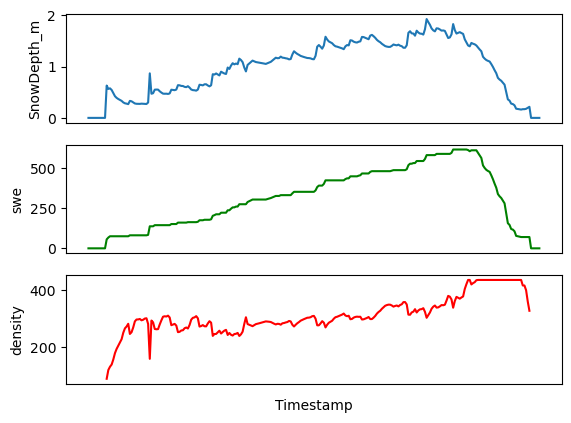

In [34]:
# View the evolution of snow depth and SWE over time during the field season
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex = True)
sns.lineplot(data = seasonal_data, x = 'Timestamp', y = 'SnowDepth_m', ax = ax1)
ax1.set(xticklabels = [])
ax1.tick_params(bottom = False)
sns.lineplot(data = seasonal_data, x = 'Timestamp', y = 'swe', color = "g", ax = ax2)
ax2.tick_params(bottom = False)
sns.lineplot(data = seasonal_data, x = 'Timestamp', y = 'density', color = "r", ax = ax3)
ax3.tick_params(bottom = False)

In [35]:
# Export the combined dataframe that contains snow depth, snow water equivalent, and snow density
seasonal_data.to_csv('seasonal_swe_density.csv')

In [36]:
seasonal_data.head()

,Timestamp,swe,SnowDepth_m,density,day,labels
0,2021-10-01,0.0,0.0,NaN,01,Oct 01
1,2021-10-02,0.0,0.0,NaN,02,Oct 02
2,2021-10-03,0.0,0.0,NaN,03,Oct 03
3,2021-10-04,0.0,0.0,NaN,04,Oct 04
4,2021-10-05,0.0,0.0,NaN,05,Oct 05


In [37]:
Feb18 = (seasonal_data[seasonal_data.labels == 'Feb 18'])
Feb18

,Timestamp,swe,SnowDepth_m,density,day,labels
140,2022-02-18,391.12,1.385333,282.329163,18,Feb 18


In [38]:
Mar25 = (seasonal_data[seasonal_data.labels == 'Mar 25'])
Mar25

,Timestamp,swe,SnowDepth_m,density,day,labels
175,2022-03-25,481.055,1.492273,322.363996,25,Mar 25


In [39]:
Mar21 = (seasonal_data[seasonal_data.labels == 'Mar 21'])
Mar21

,Timestamp,swe,SnowDepth_m,density,day,labels
171,2022-03-21,481.055,1.615905,297.700094,21,Mar 21


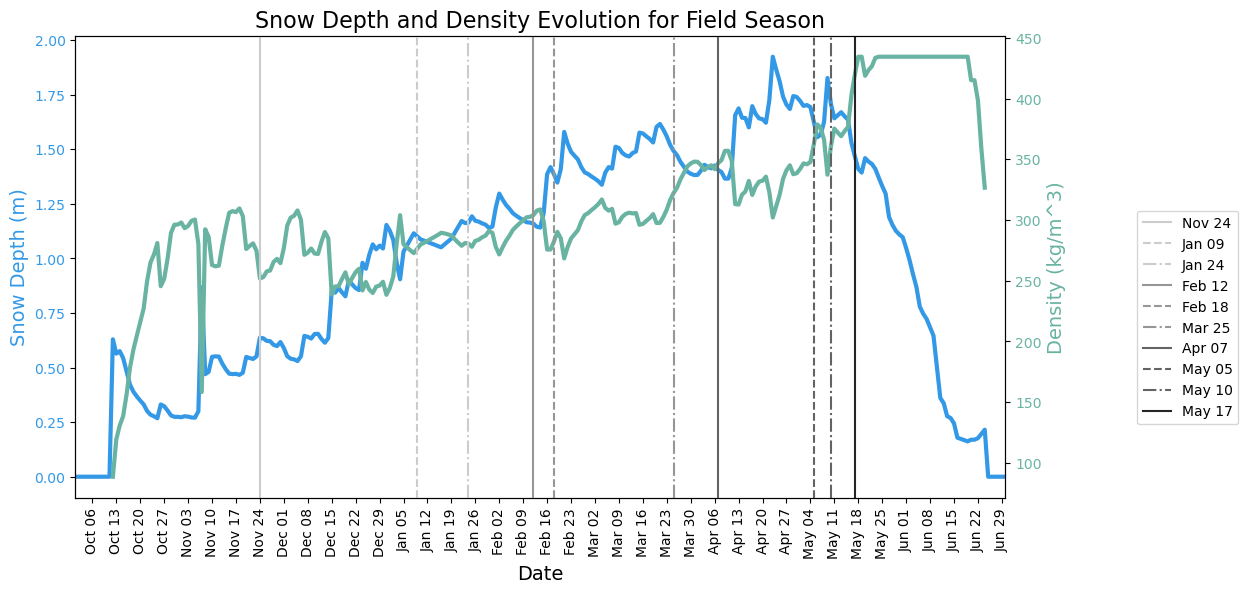

In [40]:
color_dens = "#69b3a2"
color_depth = "#3399e6"

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.margins(x = 0.0)


sdepth = sns.lineplot(data = seasonal_data, x = 'labels', y = 'SnowDepth_m', ax = ax1, color = color_depth, lw = 3)

# Ensure a major tick for each week using (interval=1) 
sdepth.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

ax1.set_xlabel("Date", fontsize = 14)
ax1.set_ylabel("Snow Depth (m)", color=color_depth, fontsize=14)
ax1.tick_params(axis="y", labelcolor=color_depth)
plt.xticks(rotation = 90)

ax2 = ax1.twinx()
sns.lineplot(data = seasonal_data, x = 'labels', y = 'density', ax = ax2, color = color_dens, lw = 3)

ax2.set_ylabel("Density (kg/m^3)", color=color_dens, fontsize=14)
ax2.tick_params(axis="y", labelcolor=color_dens)



ax2.axvline(x = 'Nov 24', label = 'Nov 24', color = '#cccccc')
ax2.axvline(x = 'Jan 09', label = 'Jan 09', color = '#cccccc', ls = '--')
ax2.axvline(x = 'Jan 24', label = 'Jan 24', color = '#cccccc', ls = '-.')
ax2.axvline(x = 'Feb 12', label = 'Feb 12', color = '#969696')
ax2.axvline(x = 'Feb 18', label = 'Feb 18', color = '#969696', ls = '--')
ax2.axvline(x = 'Mar 25', label = 'Mar 25', color = '#969696', ls = '-.')
ax2.axvline(x = 'Apr 07', label = 'Apr 07', color = '#636363')
ax2.axvline(x = 'May 05', label = 'May 05', color = '#636363', ls = '--')
ax2.axvline(x = 'May 10', label = 'May 10', color = '#636363', ls = '-.')
ax2.axvline(x = 'May 17', label = 'May 17', color = '#252525')

fig.legend(bbox_to_anchor = (1.1, 0.6), loc = 'upper right')
ax1.set_title ('Snow Depth and Density Evolution for Field Season', fontsize = 16)

plt.savefig('/Users/f67f911/Desktop/Hourglass_WX/Figures/Depth_Density.png', bbox_inches = "tight")

In [41]:
Feb18_start = '2022-02-18'
Mar25_end = '2022-03-25'

# Now create a mask and filter the hourly data by this same period
focus_mask = (seasonal_data['Timestamp'] >= Feb18_start) & (seasonal_data['Timestamp'] <= Mar25_end)
focus_df = seasonal_data.loc[focus_mask]
focus_df.head()

,Timestamp,swe,SnowDepth_m,density,day,labels
140,2022-02-18,391.120,1.385333,282.329163,18,Feb 18
141,2022-02-19,391.120,1.347429,290.271416,19,Feb 19
142,2022-02-20,401.628,1.409417,284.960445,20,Feb 20
143,2022-02-21,423.884,1.579500,268.365939,21,Feb 21
144,2022-02-22,423.884,1.525917,277.789744,22,Feb 22


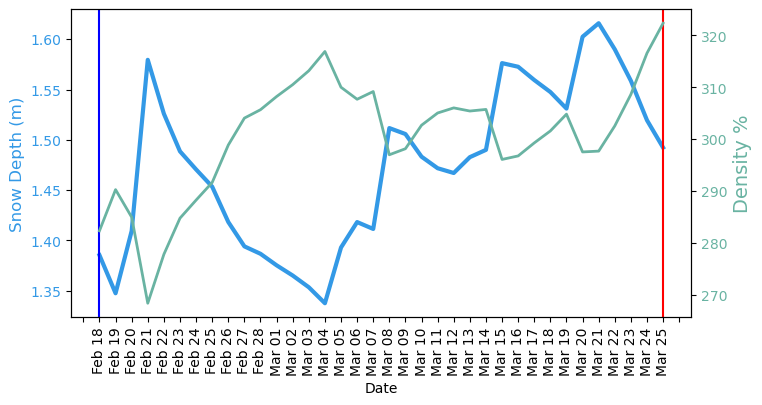

In [42]:
color_dens = "#69b3a2"
color_depth = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 4))


focus = sns.lineplot(data=focus_df, x = 'labels', y = 'SnowDepth_m', color=color_depth, lw=3, ax = ax1)
focus.xaxis.set_major_locator(mdates.DayLocator(interval=1))

ax1.set_xlabel("Date")
ax1.set_ylabel("Snow Depth (m)", color=color_depth, fontsize=12)
ax1.tick_params(axis="y", labelcolor=color_depth)
plt.xticks(rotation = 90)

ax1.axvline(x = 'Feb 18', label = 'Feb 18', color = 'b')
ax1.axvline(x = 'Mar 25', label = 'Mar 25', color = 'r')

ax2 = ax1.twinx()
sns.lineplot(data=focus_df, x = 'labels', y = 'density', color=color_dens, lw=2, ax = ax2)

ax2.set_ylabel("Density %", color=color_dens, fontsize=14)
ax2.tick_params(axis="y", labelcolor=color_dens)


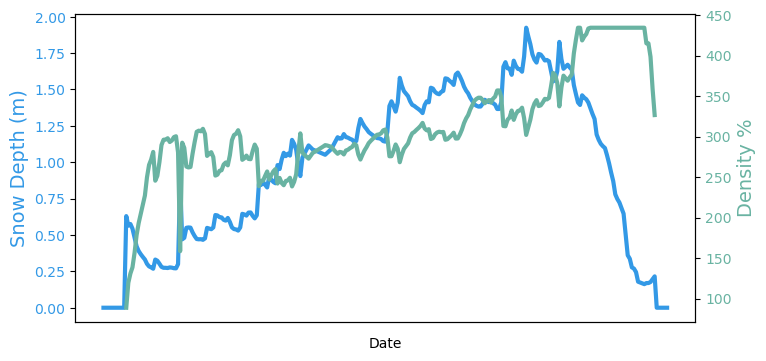

In [47]:
color_dens = "#69b3a2"
color_depth = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()


plot_ = sns.lineplot(data=seasonal_data, x = 'Timestamp', y = 'SnowDepth_m', color=color_depth, lw=3, ax = ax1)
# ax.set_xticks([dates[54]])
# new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
# # 
# tick_vals = range(0, len(new_ticks), 10)
# plt.xticks(ticks = tick_vals, rotation = 'vertical')

# ax1.set_xticklabels(ax1.get_xticks(), rotation=45)
# ax1.set(xticklabels = [])
ax1.tick_params(bottom = False)
# ax2.xaxis.set_ticks(seasonal_data['Timestamp'], labels=dates)
for index, label in enumerate(plot_.get_xticklabels()):
    if index % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

sns.lineplot(data=seasonal_data, x = 'Timestamp', y = 'density', color=color_dens, lw=3, ax = ax2)


ax1.set_xlabel("Date")
ax1.set_ylabel("Snow Depth (m)", color=color_depth, fontsize=14)
ax1.tick_params(axis="y", labelcolor=color_depth)

ax2.set_ylabel("Density %", color=color_dens, fontsize=14)
ax2.tick_params(axis="y", labelcolor=color_dens)
ax2.set(xticklabels = [])
ax2.tick_params(bottom = False)

for index, label in enumerate(plot_.get_xticklabels()):
    if index % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

# plt.savefig('/Users/f67f911/Desktop/Hourglass_WX/Figures/Depth_Density.png')